In [1]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from pprint import pprint
from tqdm import tqdm
from functions import *
from datetime import datetime
import random
import itertools
from tabulate import tabulate
from collections import Counter
import math

**N.B.:** everything contained in the paragraph *Data* was already executed, so there is no necessity to do it again. We just loaded the files needed to continue with the next exercises.

# 1. Data

In [ ]:
df_a2q = pd.read_csv('data/sx-stackoverflow-a2q.txt', sep=" ", header=None)
df_c2a = pd.read_csv('data/sx-stackoverflow-c2a.txt', sep=" ", header=None)
df_c2q = pd.read_csv('data/sx-stackoverflow-c2q.txt', sep=" ", header=None)

In [ ]:
df_a2q.columns = ['u', 'v', 't_a2q']
df_c2a.columns = ['u', 'v', 't_c2a']
df_c2q.columns = ['u', 'v', 't_c2q']

Interval of dates of the datasets

In [ ]:
min1, max1 = min(df_a2q.t_a2q), max(df_a2q.t_a2q)
min2, max2 = min(df_c2a.t_c2a), max(df_c2a.t_c2a)
min3, max3 = min(df_c2q.t_c2q), max(df_c2q.t_c2q)

In [ ]:
print('from', date_parser(min1), 'to', date_parser(max1))
print('from', date_parser(min2), 'to', date_parser(max2))
print('from', date_parser(min3), 'to', date_parser(max3))

from 2008-08-01 to 2016-03-06
from 2008-08-02 to 2016-03-06
from 2008-08-02 to 2016-03-06

We are going to pick dates from 2014-09-01 to 2016-03-06 to construct the graph.

In [ ]:
df_a2q = df_a2q.drop(drop_rows_int(df_a2q))
df_c2a = df_c2a.drop(drop_rows_int(df_c2a))
df_c2q = df_c2q.drop(drop_rows_int(df_c2q))

Saving the new dataframes into txt files, because in this way we can just upload them without "cleaning" the original datasets.

In [ ]:
df_a2q.to_csv('data/df_a2q.txt', header=None, index=None, sep=' ', mode='w')
df_c2a.to_csv('data/df_c2a.txt', header=None, index=None, sep=' ', mode='w')
df_c2q.to_csv('data/df_c2q.txt', header=None, index=None, sep=' ', mode='w')

In [ ]:
df_a2q = pd.read_csv('data/df_a2q.txt', sep=" ", header=None)
df_c2a = pd.read_csv('data/df_c2a.txt', sep=" ", header=None)
df_c2q = pd.read_csv('data/df_c2q.txt', sep=" ", header=None)

Now it is time to create the weighted graph, with the name of the dataset as keys

In [ ]:
G = nx.MultiDiGraph()
create_graph(G, df_a2q, 'a2q')
create_graph(G, df_c2a, 'c2a')
create_graph(G, df_c2q, 'c2q')

Saving the graph $G$ with self loops on a pickle file, to load everytime needed.

In [ ]:
with open('data/graph_with_loops.pkl', 'wb') as f:
    pickle.dump(G, f)

Before we created the graph with self loops of a node, but it could be useful to have also the graph without the self loops, so now we are going to create this kind of graph, using exactly the same function `create_graph`, but changing the parameter `self_loops=False`. Then, we are going to save also this graph.

In [ ]:
G_loops = nx.MultiDiGraph()
create_graph(G_loops, df_a2q, 'a2q', self_loops=False)
create_graph(G_loops, df_c2a, 'c2a', self_loops=False)
create_graph(G_loops, df_c2q, 'c2q', self_loops=False)

In [ ]:
with open('data/graph_without_loops.pkl', 'wb') as f:
    pickle.dump(G_loops, f)

In [2]:
# PICKLE
# with open('data/graph_with_loops.pkl', 'rb') as f:
#     G = pickle.load(f)

with open('data/graph_without_loops.pkl', 'rb') as f:
    G_loops = pickle.load(f)

# 2. Implementation of the backend

## Functionality 1 - Get the overall features of the graph

In [28]:
directed, num_users, total_links, average_links, density, type = functionality_1(G_loops, 'c2a')

100%|██████████| 10884271/10884271 [00:02<00:00, 4564373.92it/s]


In [30]:
print('Is the graph directed?', directed,
      '\nNumber of users', num_users,
      '\nNumber of answers/comments', total_links,
      '\nAverage number of links per user', average_links,
      '\nDensity degree of the graph', density,
      '\nIs the graph sparse or dense?', type)

Is the graph directed? False 
Number of users 899217 
Number of answers/comments 3065120 
Average number of links per user 3.4086544182327514 
Density degree of the graph 3.79069591536711e-06 
Is the graph sparse or dense? Sparse


### CREATE UNIQUE GRAPH FOR NEXT FUNCTIONALITIES

If you already have the final graph, just load it with pickle and do not run the cell below.

In [26]:
# to be runned just once
G_tot = create_final_graph(G_loops)

In [ ]:
# to be runned just one time
with open('data/graph_total.pkl', 'rb') as f:
    pickle.dump(G_tot, f)

In [2]:
# PICKLE
with open('data/graph_total.pkl', 'rb') as f:
    G_tot = pickle.load(f)

For better understanding, it could be useful to visualize the graph as a dataframe, so we saved the final graph in a pandas dataframe using a networkx function.

In [17]:
list_nodes = list(G_tot.nodes)

In [18]:
df_graph = nx.to_pandas_edgelist(G_tot, nodelist=list_nodes)

In [5]:
# to be executed just one time
df_graph.to_csv('data/df_graph.csv', index=None)

In [37]:
# new_g = interval_time(G_new, ['2016-02-01','2016-02-05'])

100%|██████████| 10300590/10300590 [00:06<00:00, 1651849.79it/s]


## Functionality 2 - Find the best users!

All in `Functionality 2.ipynb`

## Functionality 3 - Shortest Ordered Route

In [7]:
fun3(G_tot, ["2015-08-01","2015-08-02"], [2581174,928007], 3501958, 5011413)

100%|██████████| 10300590/10300590 [00:04<00:00, 2082243.89it/s]


[[3501958, 2581174], [928007, 3501958, 5011413]]

## Functionality 4 - Disconnecting graphs

Since we implemented the weight of the edge as the length of the list containing the dates in common of $u$ to $v$, it would be counterproductive to use the minimum weight for the shortest path with Dijkstra, because it will take in consideration the nodes that are not really "connected"... So we thought about using a new weight for `functionality_4` as $new\_weight = \frac{1}{old\_weight}$, so the higher the old weight is, the lower the new weight will be.

In [163]:
print(functionality_4(G_tot, ['2016-02-01','2016-02-01'], ['2016-03-01','2016-03-01'], 2359320, 1245258)[0])

100%|██████████| 10300590/10300590 [00:05<00:00, 2034402.76it/s]


Minimum links to cut: 2
Total weight: 0.8300000000000001


# 3. Implementation of the frontend

## Visualization 1 - Visualize the overall features of the graph

╒════════════╤═══════════════════╤══════════════════════════════╤════════════════════════════════════╤═══════════════════════════════╤════════════════════╕
│ Directed   │   Number of users │   Number of answers/comments │   Average number of links per user │   Density degree of the graph │ Sparse or dense?   │
╞════════════╪═══════════════════╪══════════════════════════════╪════════════════════════════════════╪═══════════════════════════════╪════════════════════╡
│ False      │            899217 │                      3065120 │                            3.40865 │                    3.7907e-06 │ Sparse             │
╘════════════╧═══════════════════╧══════════════════════════════╧════════════════════════════════════╧═══════════════════════════════╧════════════════════╛


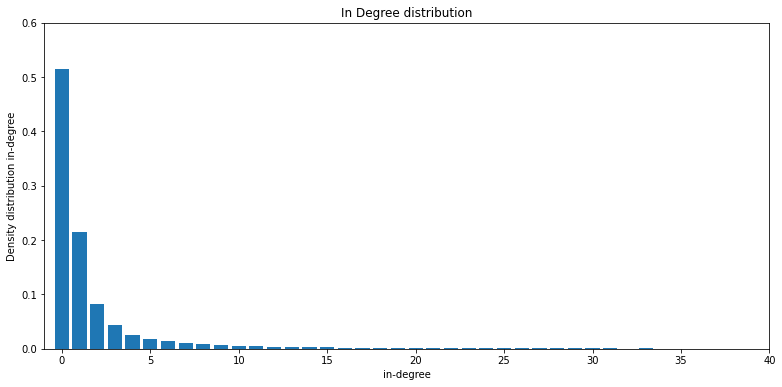

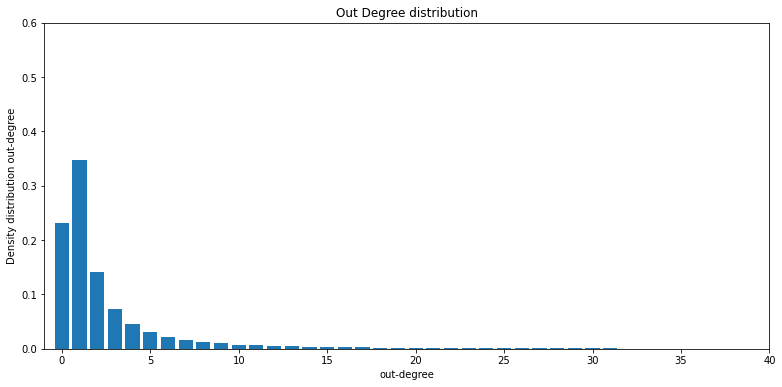

In [18]:
visualization_1(G_loops, 'c2a')

The plots show that for the in-degree nodes, there is a majority of nodes with no edges coming inside them and for the out-degree, there are more nodes with one edge coming out of them.

## Visualization 2 - Visualize the best user!

100%|██████████| 10300590/10300590 [00:05<00:00, 2028807.65it/s]

The node 149341 has 5 adjacent


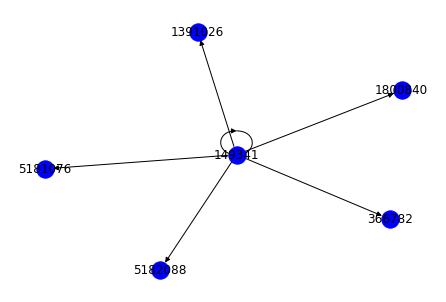

In [4]:
time_inter = ["2015-08-01","2015-08-02"]
new_g = interval_time(G_tot, time_inter)
vis2(149341,new_g)

The node 149341 has 1186 adjacent, we print only the first 75


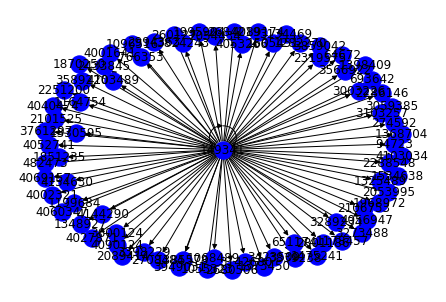

In [5]:
vis2(149341,G_tot)

## Visualization 3 - Visualize the Shortest Ordered Route

100%|██████████| 10300590/10300590 [00:05<00:00, 2014056.68it/s]


The shortest walk that goes from user 3501958  to user 5011413 is [3501958, 2581174, 928007, 3501958, 5011413]
In particular from  3501958 to 2581174 is [3501958, 2581174]
In particular from  928007 to 5011413 is [928007, 3501958, 5011413]


100%|██████████| 10300590/10300590 [00:04<00:00, 2070939.23it/s]


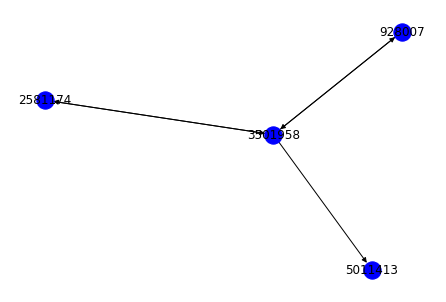

In [13]:
vis3(G_tot,["2015-08-01 ","2015-08-02"],[2581174,928007],3501958,5011413)

## Visualization 4 - Visualize disconnecting graphs

100%|██████████| 10300590/10300590 [00:04<00:00, 2103472.68it/s]


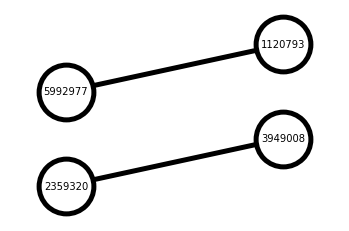

In [188]:
visualization_4(G_tot, ['2016-02-01','2016-02-01'], ['2016-03-01','2016-03-01'], 2359320, 1245258)

# 4. Algorithmic question

In [6]:
kids = set(range(1,10+1))

In [7]:
pairs_1 = {(1, 3), (3, 7), (4, 9), (7, 9), (8, 9)}
pairs_2 = {(1, 4), (1, 6), (2, 5), (4, 7), (4, 10), (6, 9), (8, 9)}
pairs_loop_1 = {(1,4),(4,5),(3,4),(5,1),(7,8)}
pairs_loop_2 = {(1, 4), (1, 7), (3, 9), (4, 8), (6, 9), (7, 8), (7, 10)}

So, since we want to know if it is possible to assign each pair of kids that fights often to different dormitories, we thought about using graphs, in particular the [DFS](https://en.wikipedia.org/wiki/Depth-first_search) algorithm, because if the graph built from the pairs as edges of the graph contains a loop, then it is not possible to assign properly the kids to different dormitories.<br>
Here is an example:<br>
We have
```
kids = [0, 1, 2, 3, 4]
pairs = {(0, 1), (1, 2), (2, 4), (4, 1)}
```
and this is the resulting graph<br>
<img src="graph_example.png" />

If we start to assign each pair of kids to the dormitories, we will have:<br>
D1 = {0, 2, 3}<br>
D2 = {1, 4}<br>
but the pair $(4, 1)$ is impossible to assign to different dormitories, since we already have in $D1$ 0 and 2, who fight with 1, who is in D2, and since 2 fights with 4, we need to put 4 in $D2$, and then come troubles, because 1 and 4 cannot stay in the same dormitory!

In [72]:
def DFS(G, v, visited, init_node, temp=-1):
    # mark node v as visited
    visited[v] = True
    if temp != -1:
        # store the visited vertex to temp
        temp.append(v)
    # iter all adjacent vertex of v
    for node in G.neighbors(v):
        # if node not visited, recurse DFS on node
        if not visited[node] and node:
            if temp==-1:
                # it will return false if the node is a leaf
                if DFS(G, node, visited, v):
                    return True
            else:
                # update the temp list
                temp = DFS(G, node, visited, v, temp)

        # if an adjacent vertex of node is already visited
        # and also is not node's parent, it means that
        # there is a cycle in the graph
        elif temp==-1 and node != init_node:
            return True
    if temp==-1:
        return False
    else:
        return temp

In [77]:
def connComp(G):
    visited = dict.fromkeys(list(G.nodes), False)
    cc = []
    for i in list(G.nodes):
        if not visited[i]:
            temp = []
            # cc.append(DFS_cc(G, i, visited, temp))
            cc.append(DFS(G, i, visited, -1, temp=temp))

    return cc


In [4]:
def fun_dorm(dict_g):
    list_g = sorted(dict_g.items(), key= lambda x: len(x[1]), reverse=True)
    items = list_g.pop(0)
    D1 = {items[0]}
    D2 = set(items[1])
    queue = items[1]
    while queue:
        node = queue.pop(0)

        for adj in dict_g[node]:
            if adj not in D1 and adj not in D2:
                queue.append(adj)
                if node in D1:
                    D2.add(adj)
                elif node in D2:
                    D1.add(adj)
                elif node not in D1 and node not in D2:
                    D1.add(node)
                    D2.add(adj)

    return D1, D2

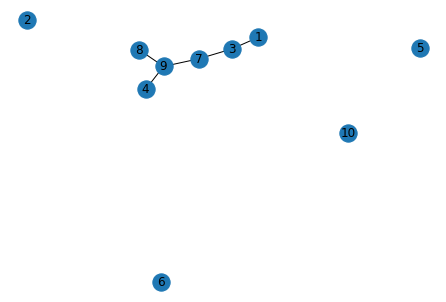

Number of kids: 10
Number of pairs of kids: 5
Pairs of kids: {(7, 9), (8, 9), (4, 9), (3, 7), (1, 3)}
The first dormitory is: {2, 3, 5, 6, 9, 10} 
The second dormitory is: {8, 1, 4, 7}


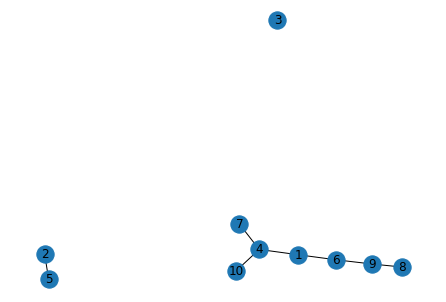

Number of kids: 10
Number of pairs of kids: 7
Pairs of kids: {(4, 10), (8, 9), (1, 6), (2, 5), (6, 9), (4, 7), (1, 4)}
The first dormitory is: {2, 3, 4, 6, 8} 
The second dormitory is: {1, 5, 7, 9, 10}


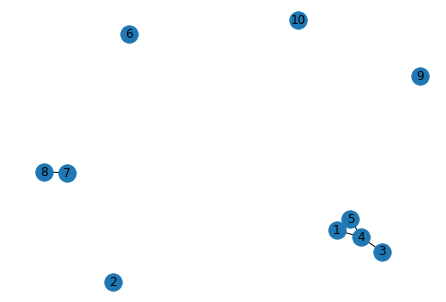

Number of kids: 10
Number of pairs of kids: 5
Pairs of kids: {(4, 5), (3, 4), (7, 8), (5, 1), (1, 4)}
Cycle found! Assignment not possible


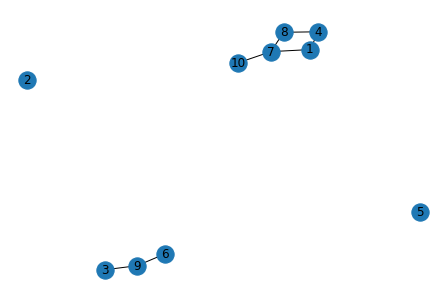

Number of kids: 10
Number of pairs of kids: 7
Pairs of kids: {(1, 7), (3, 9), (4, 8), (7, 8), (7, 10), (6, 9), (1, 4)}
Cycle found! Assignment not possible


In [39]:
list_pairs = [pairs_1, pairs_2, pairs_loop_1, pairs_loop_2]

for pairs in list_pairs:

    G = nx.Graph()
    G.add_nodes_from(kids)
    G.add_edges_from(pairs)
    nx.draw(G, with_labels=True)
    plt.show()
    visited = dict.fromkeys(list(G.nodes), False)
    res = 1
    nodes = list(G.nodes)
    print('Number of kids:', len(kids))
    print('Number of pairs of kids:', len(pairs))
    print('Pairs of kids:', pairs)
    for nod in nodes:
        if not visited[nod]:
            if DFS(G, nod, visited, -1):
                res = 0
    if res == 0:
        print('Cycle found! Assignment not possible')
    else:
        set1 = set()
        set2 = set()
        cc = connComp(G)
        dict_g = nx.to_dict_of_lists(G)
        for sg in cc:
            if len(sg) > 1:
                sub_g = dict((k, dict_g[k]) for k in sg)
                D1, D2 = fun_dorm(sub_g)
                set1.update(D1)
                set2.update(D2)
        for kid in kids:
            if kid not in set1 and kid not in set2:
                set1.add(kid)
        print('The first dormitory is:', set1,
              '\nThe second dormitory is:', set2)